In [1]:

import numpy as np
import pandas as pd


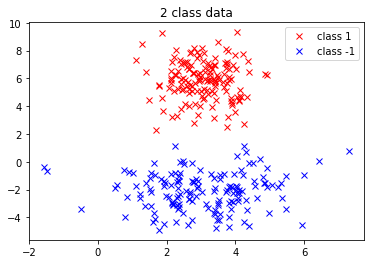

In [8]:
import matplotlib.pyplot as plt

df = pd.read_csv('./2_class_data.csv')
df1 = df[df['class_label']==1][0:150]
df2 = df[df['class_label']==-1][0:150]
plt.plot(df1['x1'], df1['x2'], 'rx', label = 'class 1')
plt.plot(df2['x1'], df2['x2'], 'bx', label = 'class -1')
plt.legend()
plt.title('2 class data')
plt.show()
train = df1[0:100].append(df2[0:100])
test = df1[100:150].append(df2[100:150])

In [3]:
import svm

clf = svm.SVM(kernel = 'linear')
clf.convex_optimization(train[['x1','x2']].to_numpy(), train['class_label'].to_numpy())
train_predictions = clf.predict(train[['x1','x2']].to_numpy())

In [4]:
clf.lagrangian_multipliers, clf.support_vectors, clf.sv_classes

(array([0.99999999, 0.73374902, 0.26625098]), array([[3.7537659 , 2.51109419],
        [4.24921019, 1.11593105],
        [2.25571938, 1.16690067]]), array([ 1., -1., -1.]))

[]

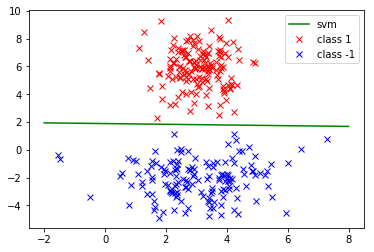

In [5]:
## weights and biases can be calculated easily only for linear kernels 

W = np.dot(clf.support_vectors.T, clf.lagrangian_multipliers*clf.sv_classes)
b = 1-np.dot(W, clf.support_vectors[0])
x1 = np.linspace(-2,8,100)
x2 = (-b-W[0]*x1)/W[1]
plt.plot(x1,x2,'g-', label = 'svm')
plt.plot(df1['x1'], df1['x2'], 'rx', label = 'class 1')
plt.plot(df2['x1'], df2['x2'], 'bx', label = 'class -1')
plt.legend()
plt.title('train data classification')
plt.plot()

[]

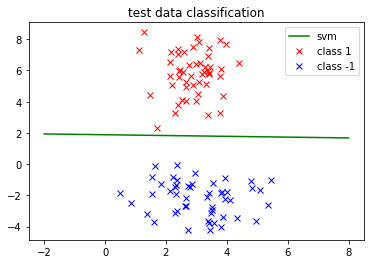

In [7]:

df1 = test[test['class_label']==1]
df2 = test[test['class_label']==-1]

x1 = np.linspace(-2,8,100)
x2 = (-b-W[0]*x1)/W[1]
plt.plot(x1,x2,'g-', label = 'svm')
plt.plot(df1['x1'], df1['x2'], 'rx', label = 'class 1')
plt.plot(df2['x1'], df2['x2'], 'bx', label = 'class -1')
plt.legend()
plt.title('test data classification')
plt.plot()